     block, center = (0,1,0)
          size (1e+20,2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     block, center = (0,-1,0)
          size (1e+20,2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


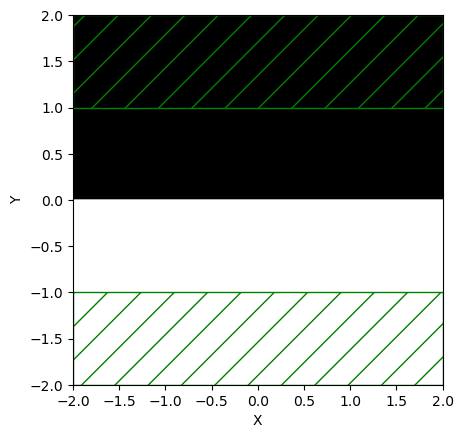

Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 64 x 64 x 1.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,1,0)
          size (1e+20,2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,-1,0)
          size (1e+20,2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 12 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
3 k-points
  Vector3<0.7853981633974483, 0.0, 0.0>
  Vector3<0.7853981633974483, 0.7853981633974483, 0.0>
  Vector3<0.7853981633974483, 1.5707963267948966, 0.0>
elapsed time for initialization: 0.026243209838867188


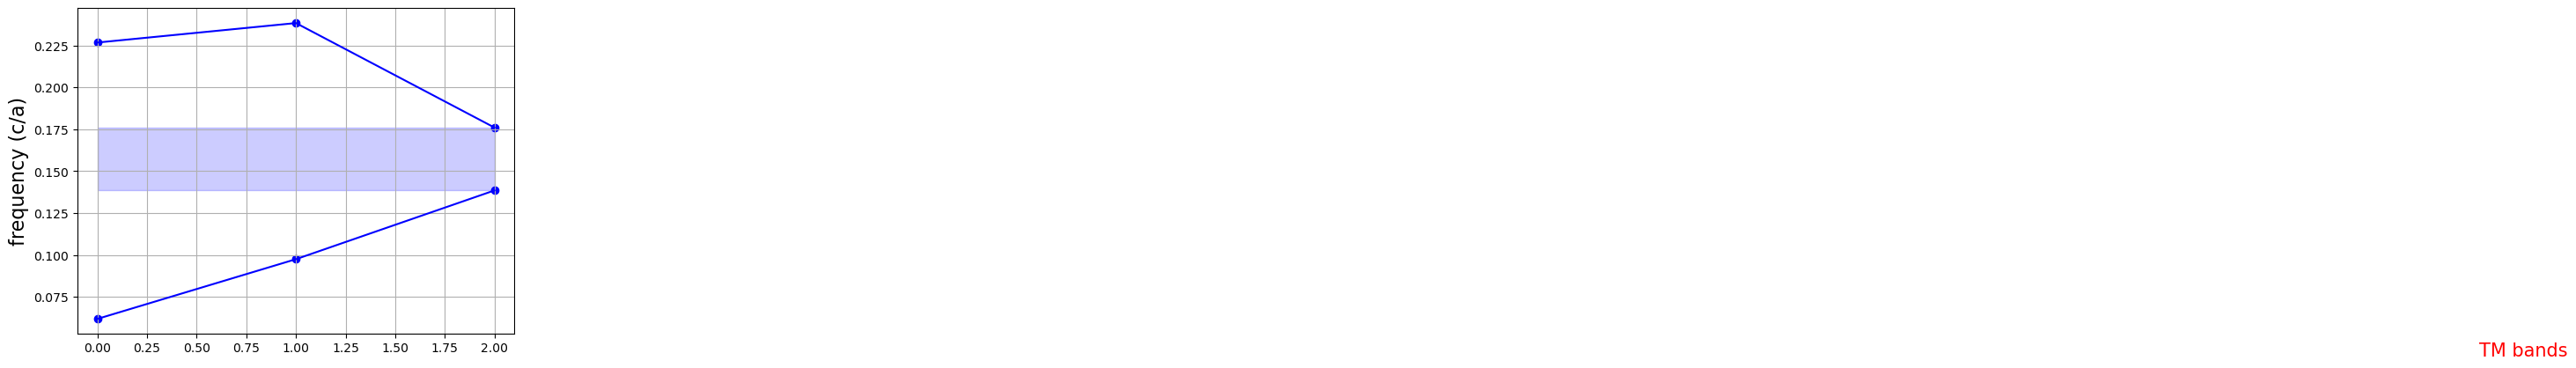

In [7]:
#here we try to plot the PBG in 1D photonic crystals
import meep as mp
import numpy as np
import math as m
from meep import mpb 
import matplotlib.pyplot as plt


#Declare the parameters
num_bands = 2
resolution = 64
eps1 = 13
eps2 = 12

corner= mp.Vector3(0,0,0)
a = 2.0 # thickness of the slab
b = 2.0 # thickness of the slab2
c = 0.0 # thickness of the slab3
a1 = a+b #periodicity in the y direction

# x = 2*a +2
# y = 2*b+2
z=  2*c+0

# defining the pml layers
boundary_layers = [
    mp.PML(thickness=1.0, direction=mp.Y, side=mp.Low),  # PML on the -x boundary
    mp.PML(thickness=1.0, direction=mp.Y, side=mp.High), # PML on the +x boundary
]

cell_size = mp.Vector3(2*a,a+b,z)
# define the geometry
geometry_lattice = mp.Lattice(size=mp.Vector3(1,1),
                              basis1=mp.Vector3(a1,0))
                          

# basis2 is set to infinite to make the simulation periodic and work 
# #if we replace it with mp.Vector3(0,0) we get error saying division by zero, to wliminate this error we set it to infinite
k_points = [
    mp.Vector3(1*m.pi/a1,0), # x point
    mp.Vector3(m.pi/a1, m.pi/a1) , # M point
    mp.Vector3(m.pi/a1,2*m.pi/a1), # x point
   
]
# k_points = mp.interpolate(1, k_points)
geometry1 = [
    mp.Block(size=mp.Vector3(mp.inf,a,mp.inf),
             center= mp.Vector3(0,a/2,0),
             material=mp.Medium(epsilon=eps1)),
]
geometry2 = [
    mp.Block(size=mp.Vector3(mp.inf,a,mp.inf),
             center=mp.Vector3(0,-a/2,0),
             material=mp.Medium(epsilon=eps2)),
]


# define the simulation
sim = mp.Simulation(resolution=resolution,
                    geometry=geometry1+geometry2,
                    boundary_layers=boundary_layers,
                    # sources=sources,
                    cell_size=cell_size)

plt.figure()
sim.plot2D()
plt.show()

ms = mpb.ModeSolver(
    geometry=geometry1+geometry2,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution)
ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list

fig, ax = plt.subplots()
x = range(len(tm_freqs))

for xz, tmz in zip(x, tm_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
  
ax.plot(tm_freqs, color='blue')
# ax.set_ylim([0, 0.5])
# ax.set_xlim([0, 2])
# Plot gaps
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)


# Plot labels
ax.text(12, 0.04, 'TM bands', color='red', size=15)

# points_in_between = (len(tm_freqs) - 4) / 3
# tick_locs = [i*points_in_between+i for i in range(4)]
# tick_labs = ['Γ', 'X', 'M', 'Γ']
# ax.set_xticks(tick_locs)
# ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()